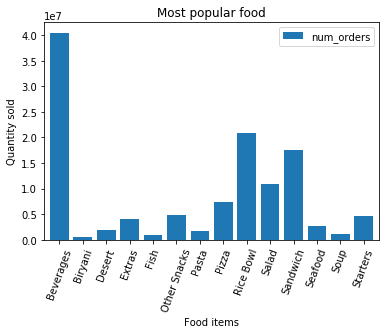

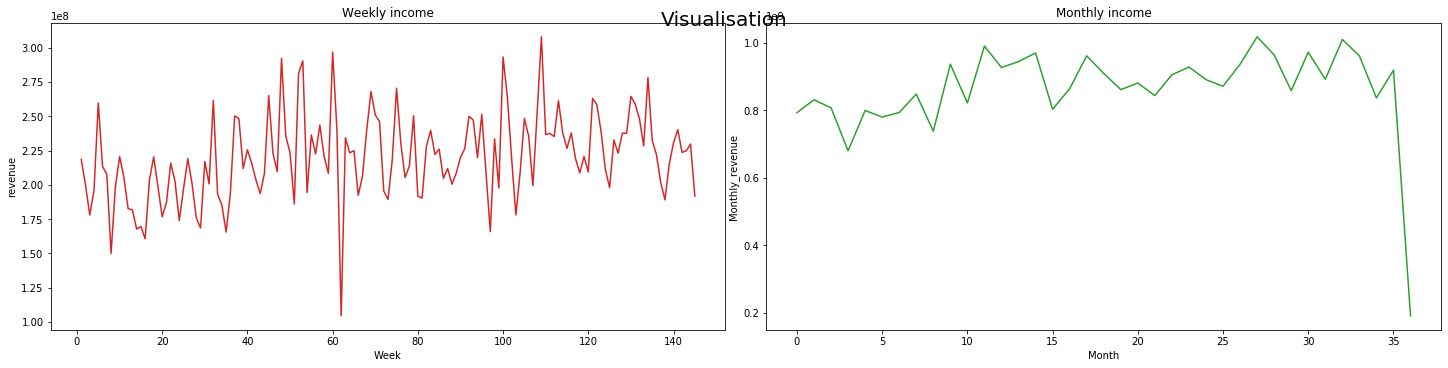

In [80]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided
df_meal = pd.read_csv("train_GzS76OK/meal_info.csv")


df_meal.head()#'''This is for displaying first five data points'''

#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

df_center = pd.read_csv("train_GzS76OK/fulfilment_center_info.csv")

df_center.head()#'''This is for displaying first five data points'''

#read train.csv file from provided dataset
#Note: Proper file directory should be provided
df_food = pd.read_csv("train_GzS76OK/train.csv")

df_food.head(5)

'''Since the provided information is in different files, your work here is to merge them.Look for the functions
in pandas library to do so'''

df_temp = pd.merge(df_meal,df_food,on='meal_id',how='outer')
df = pd.merge(df_center,df_temp,on='center_id',how = 'outer')

'''Here we have used pd.pivot_table() kindly go through the function and mention in comment what it does'''

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)



'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(y-axis)

give x label 'Food items'
give y label 'Quantity sold'


'''



#bar graph
table.plot(kind='bar',width=0.8)

#xticks 
plt.xticks(rotation=70) #'''Write on comment what you feel this function does'''

#x-axis labels 
plt.xlabel("Food items")

#y-axis labels 
plt.ylabel("Quantity sold")

#plot title 
plt.title("Most popular food")

#save plot 
plt.savefig("plot.png",dpi = 150)

#display 
plt.show()



'''************************************************'''


'''Comparison of weekly and monthly sales
 Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders 
** named 'month' by using ['week'] column (week column value divided by 4 gives month value)'''
df['revenue'] = df['checkout_price']*df['num_orders']
df['month'] = (df['week']+3)//4
df['month'] = df['month']-1




'''******************************************************************'''
'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue 
month=[i for i in range(37)] 

month_order = []
i=0
while (i<=36):
    month_order.append(df.loc[df['month']==i,'revenue'].sum())
    i+=1
'''***********************************Your code***********************'''

    
'''*********************************************************************'''
'''Here we have created two list week and week_order ,you need to store in them mapping the monthly orders'''    
#list to store week-wise revenue 
week=[i for i in range(1,146)] 
week_order=[]
i=1
while (i<=145):
    week_order.append(df.loc[df['week']==i,'revenue'].sum())
    i+=1

'''*********************************************************************'''
''' Plot two subplots in the same space : one for weekly revenue and other for monthly revenue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly revenue.
'''

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
fig.suptitle("Visualisation",ha="center",size=20)
axs[0].plot(week,week_order,'tab:red')
axs[0].set_title("Weekly income")
axs[0].set_xlabel("Week")
axs[0].set_ylabel("revenue")

axs[1].plot(month,month_order,'tab:green')
axs[1].set_title("Monthly income")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Monthly_revenue")

df.to_csv("df.csv")
''' Display the plot'''
plt.tight_layout(pad=0.3)
plt.show()

In [65]:
df

,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,revenue,month
0,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1103215,1,136.83,136.83,0,0,959,131219.97,0
1,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1091356,2,133.86,135.86,0,0,1054,141088.44,0
2,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1195933,3,135.86,133.86,0,0,891,121051.26,0
3,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1425602,4,134.86,135.86,0,0,1107,149290.02,0
4,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1249127,5,146.53,146.53,0,0,919,134661.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1308117,141,728.53,727.53,0,0,27,19670.31,35
456544,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1467391,142,728.53,728.53,0,0,40,29141.20,35
456545,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1472391,143,485.03,727.53,0,1,204,98946.12,35
456546,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1001628,144,484.03,728.53,1,1,337,163118.11,35


In [49]:
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


In [78]:
df.head(5)

,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,revenue,month
0,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1103215,1,136.83,136.83,0,0,959,131219.97,0
1,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1091356,2,133.86,135.86,0,0,1054,141088.44,0
2,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1195933,3,135.86,133.86,0,0,891,121051.26,0
3,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1425602,4,134.86,135.86,0,0,1107,149290.02,0
4,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1249127,5,146.53,146.53,0,0,919,134661.07,1
